The assignment for class was to perform a exploratory analysis of data that we collected either by webscraping or using an API
The data I chose was from Spotify exploring data about West african music. i am of Nigerian descent and my parents are both from Lagos, Nigeria. 
Everytime I go parties with a strong Nigerian influence, I am surrounded by these sounds and vibrations that i dont hear on the radio or from my friends who aren't knowledgeable of Nigerian culture.
I wanted to understand the music a bit more and gain a better understanding of what makes the music so distinct. Is it the instruments specfically the drums and guitars giving the listener a strong urge to dance?
In my project, I want to explore the audio features of West African music, specfically the instrumentalness in relation to the dancability.

In [1]:
pip install spotipy


Note: you may need to restart the kernel to use updated packages.


Spotipy had to be installed, as well as pandas, numpy, and seaborn. The other libraries besides Spotipy is already included with Anaconda. 
 

In [2]:

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
##hide cred when posted 

cid = '1fdca4b9b28646fabb6940c14750d24b'
secret = '0a6efc2da30d4d29a3d1b1b0c2d99106'
#CID = config[cid]
#Seceret = config[secret]
        

## for other users please replace CID and SECRET with your creds
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)

I want to explore this playlsit specifally, since this is the playlist I listen to when I'm feeling down or need motivation (I'm listening to it now) and it would give me insight into if there is something I specfically like about it, like a considerabley low or high value with a feature. The next cell allows the user to explore the actual meta data file.   


In [3]:
#sp.user_playlist_tracks("jonasfromfalun", "5kfE1hGYhu97qxW3n6h4S6")

In [4]:
def playlistdata(creator, playlist_id):
    
    # Create empty dataframe
    playlistfeatures = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    musictable = pd.DataFrame(columns = playlistfeatures)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get data, that is loaded into the dict
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features, this is where the actual loop is made 
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlistfeatures[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs,basically puts everthing together using Pandas
        track_df = pd.DataFrame(playlist_features, index = [0])
        musictable = pd.concat([musictable, track_df], ignore_index = True)
        
    return musictable

In [5]:
import pandas as pd
df = playlistdata("jonasfromfalun", "5kfE1hGYhu97qxW3n6h4S6")
df.head()




,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Celestine Ukwu & His Philosophers National,Celestine Ukwu & His Philosophers National,Na Nchekwube Mma Anyi Egbuna Anyi,6juKcgi75Q5uFWDyAZr1Mq,0.450,0.622,0,-5.849,1,0.0411,0.000010,0.1380,0.738,179.203,377640,3
1,T. P. Orchestre Poly-Rythmo,The Kings of Benin Urban Groove 1972 - 80,Gendamou Na Wili We Gnannin,3YLHbTeEBFvEBWZQATebxE,0.654,0.610,5,-9.846,0,0.0485,0.007190,0.0843,0.953,87.433,372347,4
2,Marijata,This Is Marijata,I Walk Alone,6sVm6ik1mXyXlDFexORZpQ,0.565,0.433,4,-14.970,0,0.0393,0.225000,0.0909,0.746,137.269,644440,4
3,Various Artists,"Golden Afrique, vol. 1 (Bolibana Collection)",Thiely,2QbgkbCilqYgE7uItsTmf0,0.813,0.566,1,-6.986,0,0.0588,0.000007,0.1730,0.957,147.427,249627,4
4,Various Artists,"Golden Afrique, vol. 1 (Bolibana Collection)",Yaye Boye,5acvGp7BKrh2pFw8WpgYNi,0.604,0.416,1,-8.559,0,0.0405,0.200000,0.1070,0.609,91.036,296000,4


df is converted from a dataframe to a csv.  


In [6]:
df.to_csv("data.csv", index = False)

Numpy and Pandas are imported for this code here. Now we need to actually read over the values we got for each song's features, numpy is used first than followed by seaborn since its a bit more indepth from my understanding. 



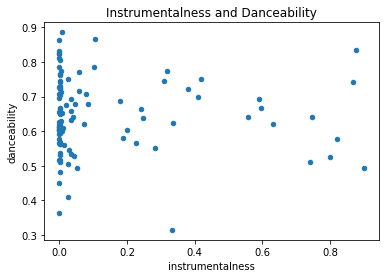

In [7]:
import numpy as np

import pandas as pd

df.plot.scatter(x='instrumentalness', y='danceability', title='Instrumentalness and Danceability')
 

From our scatterplot using Numpy, we see that the sonds instrumentalness, is actually quite low. With most songs instrumentalness being around 0. Danceability has a nice spread. This is suprising to me, since I boogie to most songs on the playlist. 
This shows there is not a relationship between Instrumentalness and danceability 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94678879a0>]],
      dtype=object)

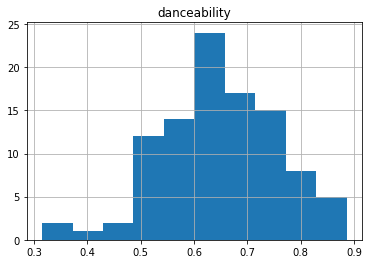

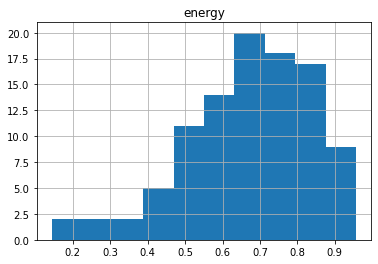

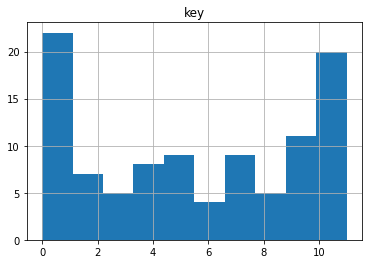

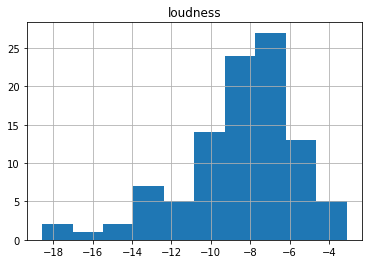

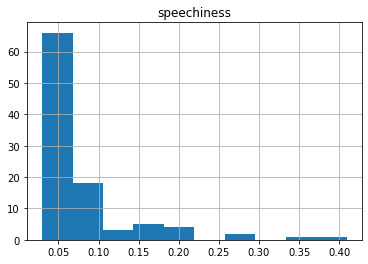

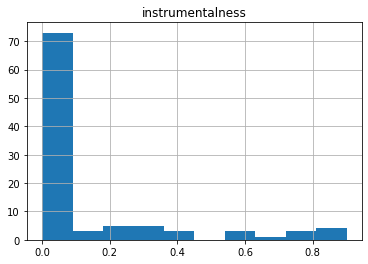

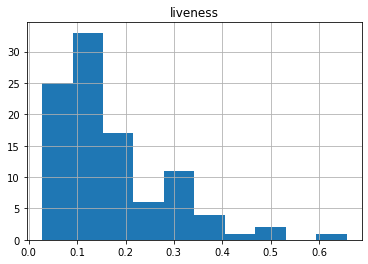

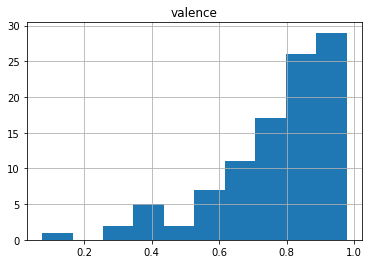

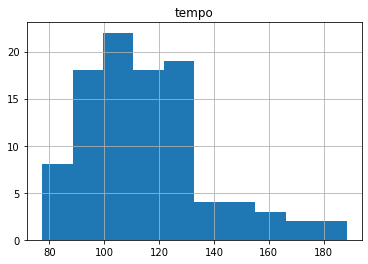

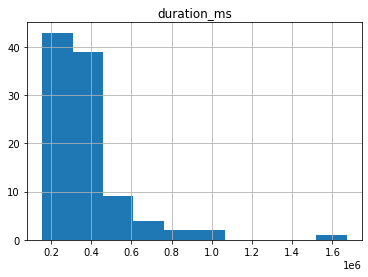

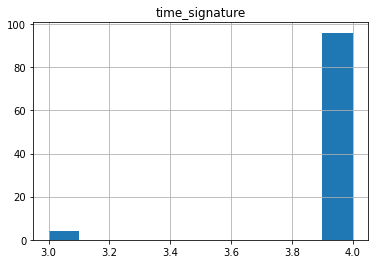

In [8]:
#df.plot.hist(subplots=True, layout=(12,1), figsize=(50, 20), bins=70)
df.hist(column='danceability')
df.hist(column='energy')
df.key=pd.to_numeric(df.key)

df.hist(column='key')
df.hist(column='loudness')
df.hist(column='speechiness')
df.hist(column='instrumentalness')
df.hist(column='liveness')
df.hist(column='valence')
df.hist(column='tempo')
df.duration_ms=pd.to_numeric(df.duration_ms)
df.hist(column='duration_ms')
df.time_signature=pd.to_numeric(df.time_signature)
df.hist(column='time_signature')

I thought the histogram would give us a better understanding but this is more so see the presence of certain features.
Each feature is present in every song as it should, this was not needed. A bar graph comparing American songs to West African songs would be better in this case. 

In [9]:
import seaborn as sns


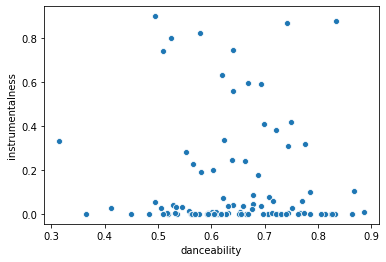

In [10]:
sns.scatterplot(x='danceability', y='instrumentalness', data=df)

Seaborn is used here, just to see if more details could be found. We see the same results compared to the pandas graph. The axes are inverted here. We still see the limited instrumentalness. 

From our findings, we have seen that there isnt really a relationship between the instrumentalness and the danceability when it come to West African music.
#I was limited in my knowledge Python and would have liked to compare American music data to West African
#Sources that were used were mostly from Towards data science and Medium. 
#Specfically: https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b
#https://medium.com/better-programming/how-to-extract-any-artists-data-using-spotify-s-api-python-and-spotipy-4c079401bc37